<a href="https://colab.research.google.com/github/basarr/monte-carlo-engine/blob/main/03_mc_brownian_motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 3: Discrete Brownian Motion (Normal Increments)

Goal:
- Replace ±1 random-walk increments with Normal increments
- Simulate (discrete) Brownian motion paths
- Verify the key property:  $\operatorname{Var}(W_t) = t$
- Prepare the exact machinery needed for GBM in the next phase

We stay in discrete time, but use the standard Brownian scaling.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

## Discrete Brownian Motion Construction

In continuous time, Brownian motion \(W_t\) has:
- $(W_0 = 0)$
- independent increments
- $W_{t+\Delta t} - W_t \sim \mathcal{N}(0, \Delta t)\$

In discrete time on a grid $t_k = k\Delta t$, we simulate:

\[
$\Delta W_k \sim \mathcal{N}(0, \Delta t), \quad
W_{k} = \sum_{i=1}^{k} \Delta W_i$
\]

In [3]:
T = 1.0               # total time horizon
n_steps = 252         # number of time steps
n_paths = 5_000       # number of paths
dt = T / n_steps

# Normal increments with variance dt: N(0, dt)
dW = np.sqrt(dt) * np.random.randn(n_paths, n_steps)

# Build W by cumulative summation across time
W = np.cumsum(dW, axis=1)

# W0 = 0 as the first column
W = np.hstack([np.zeros((n_paths, 1)), W])

W.shape

(5000, 253)

## Visualize Brownian Paths

Brownian paths looks kinda wiggly and continuous (in the limit),
but we simulate them on a discrete grid.

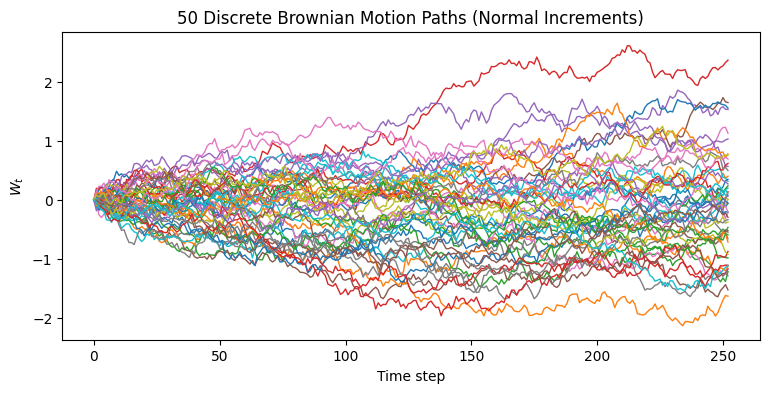

In [10]:
plt.figure(figsize=(9, 4))

for i in range(50):
    plt.plot(W[i], linewidth=1)

plt.xlabel("Time step")
plt.ylabel("$W_t$")
plt.title("50 Discrete Brownian Motion Paths (Normal Increments)")
plt.show()

## Property Check: $\operatorname{Var}(W_t) = t$

For Brownian motion:
- \$\mathbb{E}[W_t] = 0\$
- \$\mathrm{Var}(W_t) = t\$

So at final time $T\$, we should have:
- mean close to 0
- standard deviation close to \$\sqrt{T}\$

In [8]:
W_T = W[:, -1]

mean_WT = np.mean(W_T)
std_WT = np.std(W_T, ddof=1)

mean_WT, std_WT, np.sqrt(T)

(np.float64(-0.022745720426252017),
 np.float64(0.9957077778742561),
 np.float64(1.0))

## Variance Over Time

We also check that variance grows linearly with time.

We estimate:
- empirical $\operatorname{Var}(W_tk)$ across paths
- compare to theoretical $t_k$

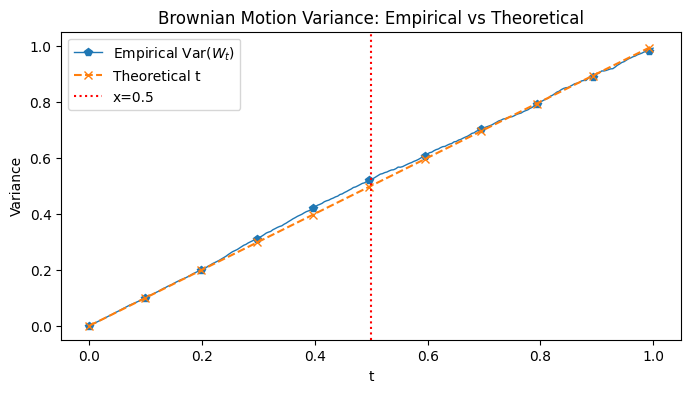

In [28]:
from matplotlib.typing import MarkerType
# time grid (including 0)
t_grid = np.linspace(0, T, n_steps + 1)

# empirical variance at each time across paths
var_empirical = np.var(W, axis=0, ddof=1)

plt.figure(figsize=(8, 4))
plt.plot(t_grid, var_empirical, marker='p', markevery=25, linewidth=1, label=r'Empirical $\operatorname{Var}(W_t)$')
plt.plot(t_grid, t_grid, linestyle='--', marker='x', markevery=25, label='Theoretical t')
plt.axvline(x=0.5, color='r', linestyle=':', label='x=0.5') # Add a vertical red line at x=0.5
plt.xlabel("t")
plt.ylabel("Variance")
plt.title("Brownian Motion Variance: Empirical vs Theoretical")
plt.legend()
plt.show()

## Increment Check (Independence Intuition)

Increments over disjoint intervals should be uncorrelated in theory.
We do a simple empirical check: correlation between consecutive increments.

In [29]:
# take increments from one path matrix
inc_1 = dW[:, :-1].ravel()
inc_2 = dW[:, 1:].ravel()

corr = np.corrcoef(inc_1, inc_2)[0, 1]
corr

np.float64(-0.0012076917231179031)

## Summary

- Simulated discrete Brownian motion using Normal increments $N(0, dt)$
- Verified the key scaling: $\operatorname{Var}(W_t) ≈ t$
- Checked terminal behavior: $W_T$ has $std ≈ √T$
- This is the direct ingredient needed for GBM simulation next

Next phase: build geometric Brownian motion (GBM) from Brownian paths.